# Calculating the trajectory of a photon around a Schwarzschild blackhole

In [1]:
from curvedpy.geodesics.blackhole import BlackholeGeodesicIntegrator
from curvedpy.utils.conversions import Conversions
import numpy as np
import time 
import matplotlib.pyplot as plt

## Create a BlackholeGeodesicIntegrator object that calculates geodesics for a spherically symmetric blackhole using the Schwarzschild metric

The mass is in geometrized units. A mass of 1 gives a blackhole with a Schwarzschild radius of 2. a=0 means a non-rotating blackhole. At this moment (28/01/2025) a rotating blackhole is not yet implemented.

In [2]:
gi = BlackholeGeodesicIntegrator(mass = 1.0, a = 0.0, time_like = False, verbose=False)

In [3]:
print(f"Radius of the blackhole in Schwarzschild radii: {gi.get_r_s()}")

Radius of the blackhole in Schwarzschild radii: 2.0


## Example geodesic/trajectory of a photon that escapes

The function geodesic(k0_xyz, x0_xyz) requires two initial conditions in the for of 3-vectors in cartesian coordinates. 
* x0_xyz is the starting position of the particle. 
* k0_xyz is the starting 3-vector for the momentum (photon) or the momentum per mass (massive body).

The 4-vector initial conditions are calculated by starting at t=0 and time component of k0 is calculated using the norm of the 4-vector. This norm is zero for a photon and -1 for a massive particle.

Exec. time:  0.15303826332092285
Integrator result:  The solver successfully reached the end of the integration interval.
Event of hitting the blackhole:  False


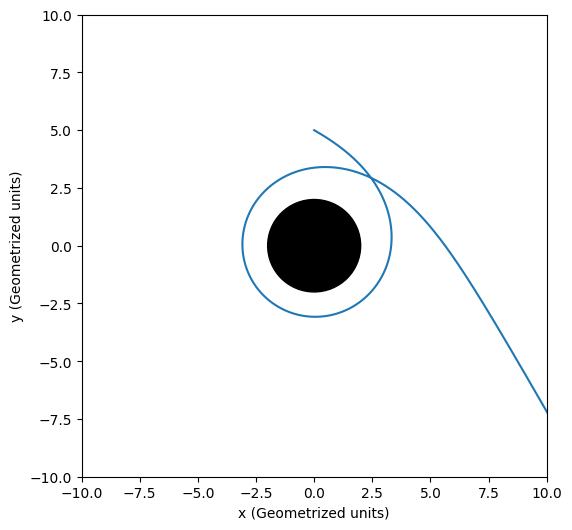

In [4]:
k0_xyz = np.array([1.0, -0.57, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
k_xyz, x_xyz , result = gi.geodesic(k0_xyz, x0_xyz,max_step = 1.0, curve_end=50, nr_points_curve=10000)
print("Exec. time: ", time.time()-st)
print("Integrator result: ", result.message)
print("Event of hitting the blackhole: ", result.hit_blackhole)

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Example geodesic/trajectory of a photon that falls into the blackhole

Exec. time:  0.8259060382843018
Integrator result:  A termination event occurred.
Event of hitting the blackhole:  True


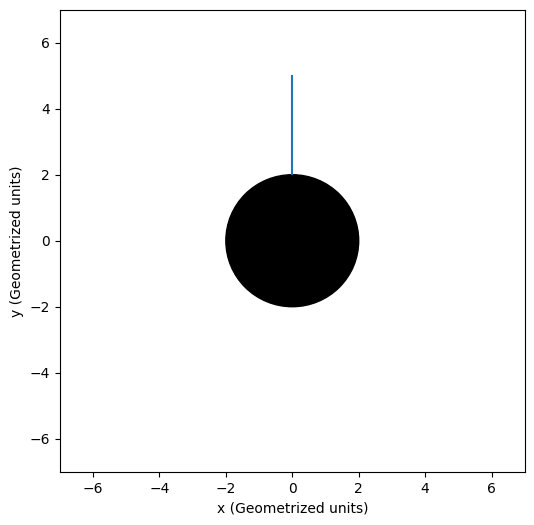

In [5]:
k0_xyz = np.array([0., -0.01, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
k_xyz, x_xyz , result = gi.geodesic(k0_xyz, x0_xyz,max_step = 1.0, curve_end=500, nr_points_curve=100)
print("Exec. time: ", time.time()-st)
print("Integrator result: ", result.message)
print("Event of hitting the blackhole: ", result.hit_blackhole)

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Multiple photons starting at x=-10 and moving to the right

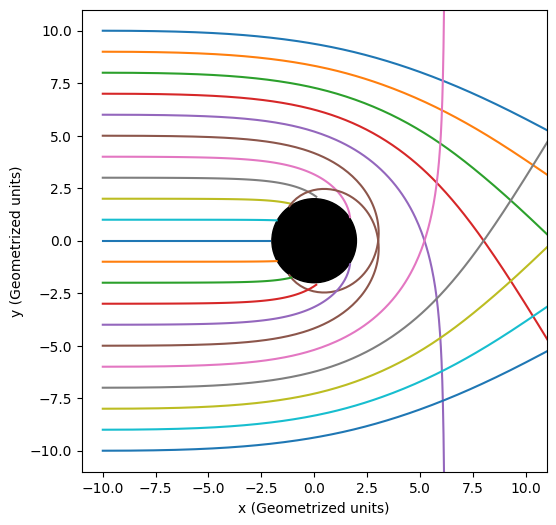

In [6]:
circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)

nr = 21
for k_xyz, x_xyz , result in gi.geodesic(\
                        k0_xyz = [np.array([0.1, 0.0, 0.0]) for i in range(nr)], \
                        x0_xyz = [np.array([-10.0, 10-i, 0.0]) for i in range(nr)], \
                        curve_end=500, nr_points_curve=500):
    ax.plot(*x_xyz[0:2])

lim = 11
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()